Se tiene un conjunto de 22 sujetos G1 y 18 sujetos G2, ambos grupos sujetos sanos. Un grupo portador de la mutación E280A

frecuencia de muestreo de 500 Hz
Épocas de 5 segundos

Sobre estos sujetos se hizo una descomposición ICA y de este análisis se extraen los componentes neuronales

El objetivo del presente Notebook es poder evaluar a nivel descriptivo las bandas de EEG de acuerdo a los últimos lineamientos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


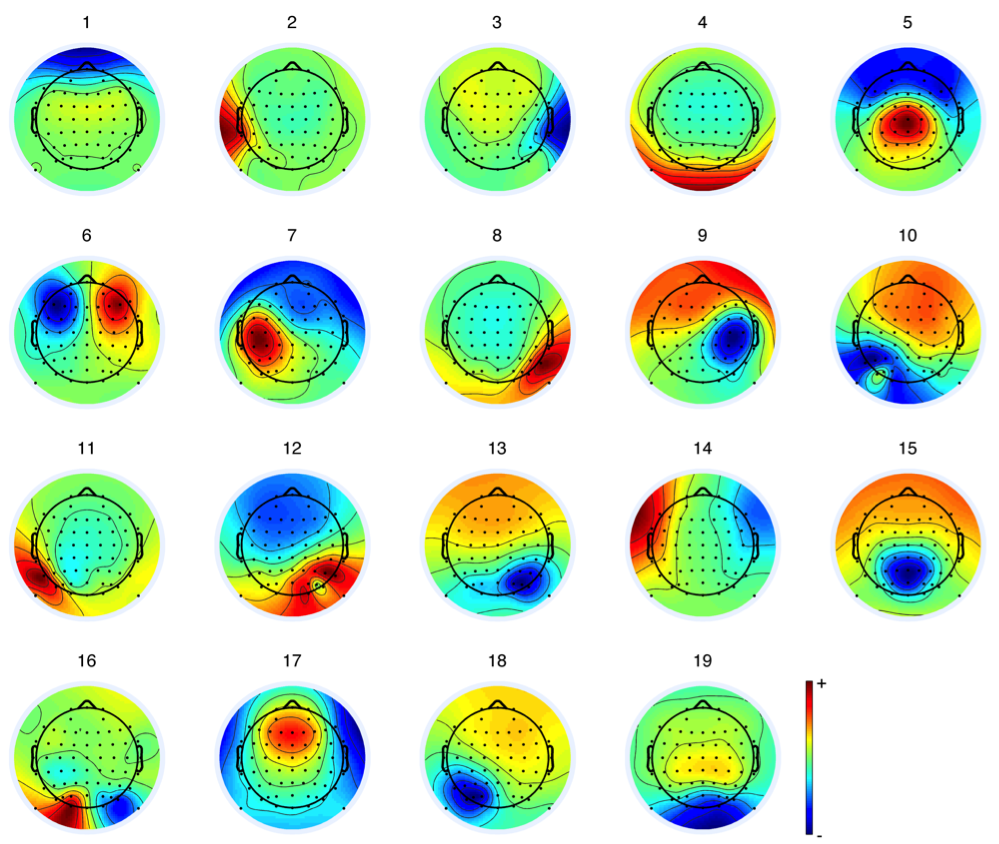

In [ ]:
#manejo de elementos del sistema, como carpetas
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt
import glob
#importamos la rutina de welch
from scipy.signal import welch as pwelch

archivos_g1 = glob.glob('/content/drive/Shareddrives/curso_neuroingeniería/g1/*.mat')
archivos_g2 = glob.glob('/content/drive/Shareddrives/curso_neuroingeniería/g2/*.mat')

fs = 500;

In [ ]:
#contenido de una de las carpetas
print(len(archivos_g2))

In [ ]:
#veamos que tiene un archivo particular
data = sio.loadmat(archivos_g1[1]);
print(data.keys())
senal = data['data_components']
print(senal.shape)

In [ ]:
#se seleccionan solo los componentes neuronales
#senal = senal[np.asarray([3,4,5,6,7,8,9,10,11,12,14,16,17,18]),:,:]
senal = senal[[3,4,5,6,7,8,9,10,11,12,14,16,17,18],:,:]
ICs = senal.shape[0]

In [ ]:
nperseg = 2000
noverlap = int(nperseg/2);
max_frequency = 50

In [ ]:
#se crea la matriz grupal sujetosxcanalesxbandas
potencia_g1 = np.zeros((len(archivos_g1),ICs,5))
contador = 0

#por cada archivo de G1 se hace el analisis espectral
for archivo in archivos_g1:
  #se trabaja este en la misma carpeta de los datos para que pueda funcionar
  data = sio.loadmat(archivos_g1[contador]);
  data = data['data_components'];

  data = data[[3,4,5,6,7,8,9,10,11,12,14,16,17,18],:,:]

  #%% CONTINUA
  sensores = data.shape[0];
  puntos = data.shape[1];
  epocas = data.shape[2];

  senal_continua = np.reshape(data,(sensores, puntos*epocas), order = 'F');

  #%% USANDO WELCH sobre todos los canales
  f, Pxx = pwelch(senal_continua, fs, 'hanning', nperseg, noverlap);

  delta = np.sum(Pxx[:,f <= 4],axis=1);
  theta = np.sum(Pxx[:,(f <= 8) & (f > 4)],axis=1)
  alfa = np.sum(Pxx[:,(f <= 13) & (f > 8)],axis=1)
  beta = np.sum(Pxx[:,(f <= 30) & (f > 13)],axis=1)
  gamma = np.sum(Pxx[:,(f <= max_frequency) & (f > 30)],axis=1)

  total = np.sum(Pxx[:,f <= max_frequency],axis=1)
  delta_relativo = delta/total
  theta_relativo = theta/total
  alfa_relativo = alfa/total
  beta_relativo = beta/total
  gamma_relativo = gamma/total

  potencia_g1[contador,:,0] = delta_relativo
  potencia_g1[contador,:,1] = theta_relativo
  potencia_g1[contador,:,2] = alfa_relativo
  potencia_g1[contador,:,3] = beta_relativo
  potencia_g1[contador,:,4] = gamma_relativo
  contador += 1

In [ ]:
#ver que las potencias relativas sumen 1
print(np.sum(np.squeeze(potencia_g1[0,:,:]),axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#se crea la matriz grupal sujetosxcanalesxbandas
potencia_g2 = np.zeros((len(archivos_g2),ICs,5))
contador = 0

#por cada archivo de G1 se hace el analisis espectral
for archivo in archivos_g2:
  #se trabaja este en la misma carpeta de los datos para que pueda funcionar
  data = sio.loadmat(archivos_g2[contador]);
  data = data['data_components'];

  data = data[[3,4,5,6,7,8,9,10,11,12,14,16,17,18],:,:]

  #%% CONTINUA
  sensores = data.shape[0];
  puntos = data.shape[1];
  epocas = data.shape[2];

  senal_continua = np.reshape(data,(sensores, puntos*epocas), order = 'F');

  #%% USANDO WELCH sobre todos los canales
  f, Pxx = pwelch(senal_continua, fs, 'hanning', nperseg, noverlap);

  delta = np.sum(Pxx[:,f <= 4],axis=1);
  theta = np.sum(Pxx[:,(f <= 8) & (f > 4)],axis=1)
  alfa = np.sum(Pxx[:,(f <= 13) & (f > 8)],axis=1)
  beta = np.sum(Pxx[:,(f <= 30) & (f > 13)],axis=1)
  gamma = np.sum(Pxx[:,(f <= max_frequency) & (f > 30)],axis=1)

  total = np.sum(Pxx[:,f <= max_frequency],axis=1)
  delta_relativo = delta/total
  theta_relativo = theta/total
  alfa_relativo = alfa/total
  beta_relativo = beta/total
  gamma_relativo = gamma/total

  potencia_g2[contador,:,0] = delta_relativo
  potencia_g2[contador,:,1] = theta_relativo
  potencia_g2[contador,:,2] = alfa_relativo
  potencia_g2[contador,:,3] = beta_relativo
  potencia_g2[contador,:,4] = gamma_relativo
  contador += 1

In [ ]:
#ver que las potencias relativas sumen 1
print(np.sum(np.squeeze(potencia_g2[0,:,:]),axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#Grafico delta promedio todos los componentes
promedio_g1 = np.mean(potencia_g1,axis=0)
promedio_g2 = np.mean(potencia_g2,axis=0)

Grafiquemos el promedio de la banda delta en los componentes de interés

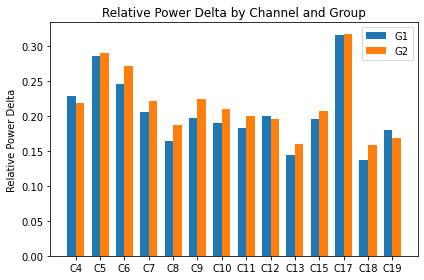

In [ ]:
labels = ['C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15', 'C17', 'C18', 'C19']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, promedio_g1[:,0], width, label='G1')
rects2 = ax.bar(x + width/2, promedio_g2[:,0], width, label='G2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Power Delta')
ax.set_title('Relative Power Delta by Channel and Group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


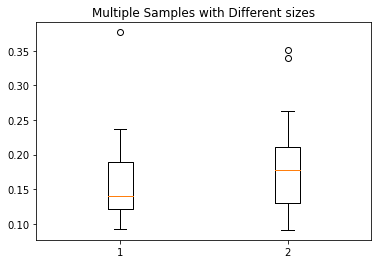

In [ ]:
#veamos el componente cuatro delta
data = [np.squeeze(potencia_g1[:,4,0]),np.squeeze(potencia_g2[:,4,0])]
plt.title('Multiple Samples with Different sizes')
plt.boxplot(data)

plt.show()


Pruebas estadísticas adicionales en Python [link text](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)



In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = np.squeeze(potencia_g1[:,4,0])
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.824, p=0.001
Probably not Gaussian


In [ ]:
# Prueba t
from scipy.stats import ttest_ind
data1 = np.squeeze(potencia_g1[:,4,0])
data2 = np.squeeze(potencia_g2[:,4,0])
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente la misma distribución de datos')
else:
	print('Probablemente distribución diferente de datos')

stat=-1.042, p=0.304
Probablemente la misma distribución de datos


In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = np.squeeze(potencia_g1[0:18,4,0])
data2 = np.squeeze(potencia_g2[:,4,0])
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=62.000, p=0.306
Probably the same distribution


Para desarrollar

1) Describir las otras bandas de frecuencia
2) Evaluar los resultados con la división de frecuencia usada en IPEG 2012

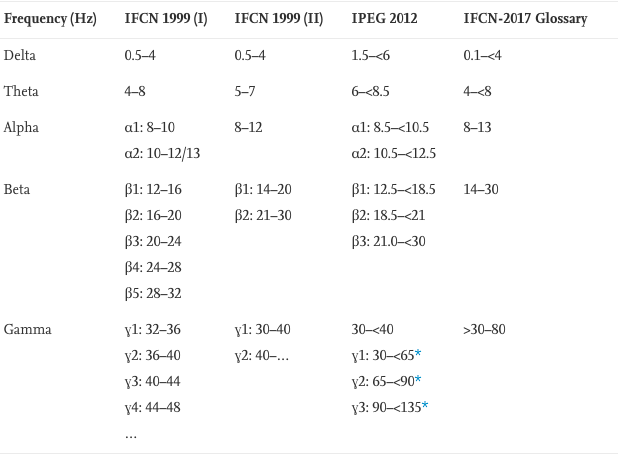

Evaluar las bandas anteriores tomando la frecuencia máxima hasta 30 (no se tomaría Beta) y hasta 45 ([link text](https://www.sciencedirect.com/science/article/pii/S1388245719311642))